LOADING DATASET

In [8]:
import os
import cv2

# Path to the main directory containing all subdirectories with images
path_to_main_directory = r"C:\Users\megha\Downloads\IDD_MULTIMODAL"

images = []
for subdirectory in os.listdir(path_to_main_directory):
    # Construct the path to the subdirectory
    subdirectory_path = os.path.join(path_to_main_directory, subdirectory)

    # Iterate over all files in the subdirectory and add images to the list
    for filename in os.listdir(subdirectory_path):
        img_path = os.path.join(subdirectory_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)

COUNTING SUBDIRECTORIES

In [10]:
import os

path_to_folder = r"C:\Users\megha\Downloads\IDD_MULTIMODAL"
subdirectories = [f.path for f in os.scandir(path_to_folder) if f.is_dir()]

print(len(subdirectories))

3


LISTING DIRECTORIES

In [11]:
import os

path_to_images = r"C:\Users\megha\Downloads\IDD_MULTIMODAL"

# Get a list of all files and directories in the path
contents = os.listdir(path_to_images)

# Loop through each item in the list
for item in contents:
    # Check if the item is a directory
    if os.path.isdir(os.path.join(path_to_images, item)):
        print("Found directory:", item)

Found directory: idd_mm_primary
Found directory: idd_mm_secondary
Found directory: idd_mm_supplement


COUNTING IMAGES IN DIRECTORIES

In [12]:
import os

root_path = r"C:\Users\megha\Downloads\IDD_MULTIMODAL"
num_images = 0

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1

    # Print the number of image files in the current subdirectory
    print(f"Found {num_images} images in directory: {dirpath}")
    num_images = 0

Found 0 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL
Found 0 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary
Found 0 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary\idd_multimodal
Found 0 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary\idd_multimodal\primary
Found 0 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary\idd_multimodal\primary\d0
Found 4531 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary\idd_multimodal\primary\d0\leftCamImgs
Found 0 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary\idd_multimodal\primary\d1
Found 4351 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary\idd_multimodal\primary\d1\leftCamImgs
Found 0 images in directory: C:\Users\megha\Downloads\IDD_MULTIMODAL\idd_mm_primary\idd_multimodal\primary\d2
Found 4017 images in directory: C:\Users\megha\Downloads\IDD_

VISUALISING THE DISTRIBUTION OF IMAGES

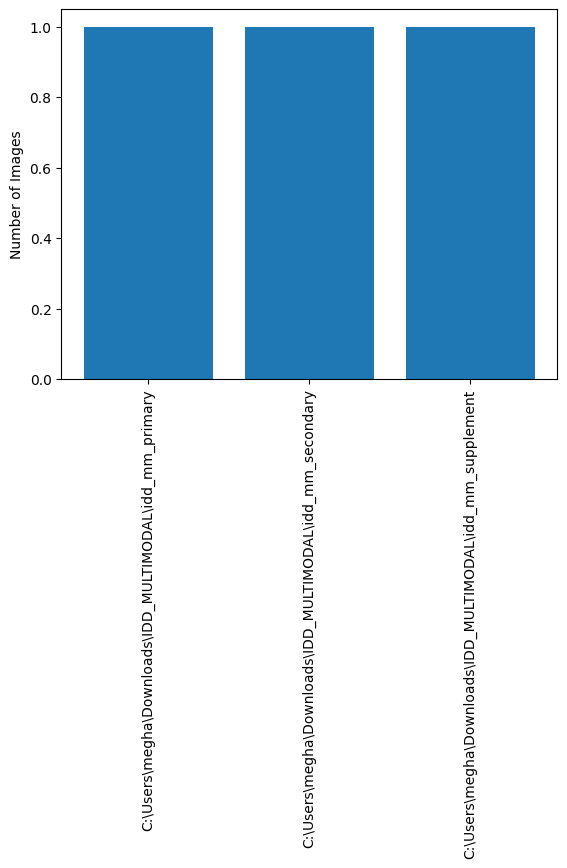

In [13]:
import matplotlib.pyplot as plt

subdirectories = [os.path.join(root_path, d) for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))]

# Count the number of images in each subdirectory
counts = [0] * len(subdirectories)
for i, directory in enumerate(subdirectories):
    counts[i] = len(os.listdir(directory))

# Create a bar chart to visualize the distribution
plt.bar(subdirectories, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()

PLOTTING HISTOGRAM OF IMAGE SIZES

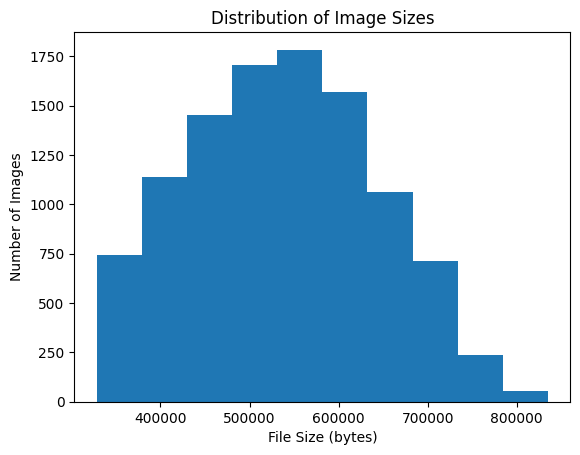

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

PLOTTING DISTRIBUTION OF IMAGE SIZES USING PLOTLY

In [16]:
import plotly.express as px
import os
import numpy as np

# Root directory path
root_path = r"C:\Users\megha\Downloads\IDD_MULTIMODAL"

# List to store file sizes in MB
file_sizes_mb = []

# Iterate over each file in the root directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        try:
            file_path = os.path.join(dirpath, filename)
            file_size_mb = os.path.getsize(file_path) / 1_000_000  # Convert to MB
            file_sizes_mb.append(file_size_mb)
        except OSError as e:
            print(f"Error processing file {file_path}: {e}")

# Create a histogram figure with plotly
fig = px.histogram(x=file_sizes_mb, nbins=50, title="Distribution of Image Sizes")

# Customize the plot
fig.update_layout(
    xaxis_title="File Size (MB)",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1,
    xaxis_gridcolor='lightgrey',
    yaxis_gridcolor='lightgrey'
)

# Show the plot
fig.show()


PLOTTING A 3D PLOT OF IMAGE RESOLUTION

In [19]:
import plotly.express as px
import pandas as pd

# Create a dataframe with the resolutions
df = pd.DataFrame(resolutions, columns=['width', 'height'])

# Create a 3D scatter plot with plotly
fig = px.scatter_3d(df, x='width', y='height', z=df.index,
                    title='Distribution of Image Resolutions',
                    labels={'width': 'Width (pixels)',
                            'height': 'Height (pixels)',
                            'index': 'Image Index'},
                    color=df.index)

# Customize the plot
fig.update_traces(marker=dict(size=2, line=dict(width=0.5)))

# Show the plot
fig.show()

PLOTTING THE MEAN COLOR DISTRIBUTION

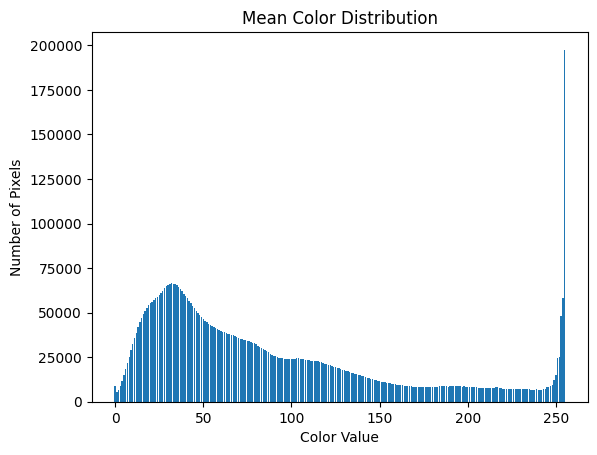

In [20]:
import matplotlib.pyplot as plt

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

PLOTTING THE MEAN COLOR DISTRIBUTION USING PLOTLY

In [21]:
import plotly.graph_objects as go

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Create a bar chart of the mean color distribution
fig = go.Figure(
    go.Bar(x=np.arange(256), y=mean_color_distribution, name="Mean Color Distribution")
)

# Set the title and axis labels
fig.update_layout(
    title="Mean Color Distribution",
    xaxis_title="Color Value",
    yaxis_title="Number of Pixels"
)

# Show the plot
fig.show()